# Iterated Function Systems
#### - Fractals!
---

We want to visualize fractals generated by **iterated function systems** (**IFS**'s). We need to gather and understand a couple special ingredients in order to bake some delicious IFS's.


Firstly, we need to just accept that we are in a metric space (or compact set) $A$, and that we have a metric (or distance function) $d:(x,y)\rightarrow \mathbb{R}^+$ which measures the distances between any two points $x$ and $y$ in $A$. <br/>


This just means we are in some space, like a sheet of paper, or on a line, and that we have some sensible idea of how to measure the distance from any two points on it. We will have concrete examples on your screen soon, I promise! Next we need the notion of a *contraction mapping*.

### Contraction Mappings
---
A function $f: A \rightarrow A$ is a **contraction mapping** if there exists some constant, $k$ with $0\leq k < 1$ such that for all $x$ and $y$ in $A$,

$$d(f(x),f(y)) \leq kd(x,y).$$

In short, this maps all points in the domain, closer together. In fact, *their mutual distance is less than $k$ times as small*. For example, if $k=\frac{1}{3},$ then the new distance between the output points would be less than a third of their original distance.<br/><br/><br/>

**Example:** Consider the function $f:[0,1]\rightarrow[0,1]$ with $f(x) = \frac{1}{8}x.$ Since we are on the real line, we'll assume distance $d(x,y)=|y-x|$. </br>

$$d(f(x),f(y)) = |f(y)-f(x)| = |\frac{1}{8}y-\frac{1}{8}x| = \frac{1}{8}|y-x| \leq \frac{1}{8} d(x,y).  $$

In particular, we showed that:

$$d(f(x),f(y)) \leq \frac{1}{8} d(x,y)$$

Which gives us $\frac{1}{8} = k$ as the **contraction ratio** of the function $f$.

> 💡 In fact, since we know that the last inequality is actually an equality, we can call $k$ the **similarity ratio**.<br/>

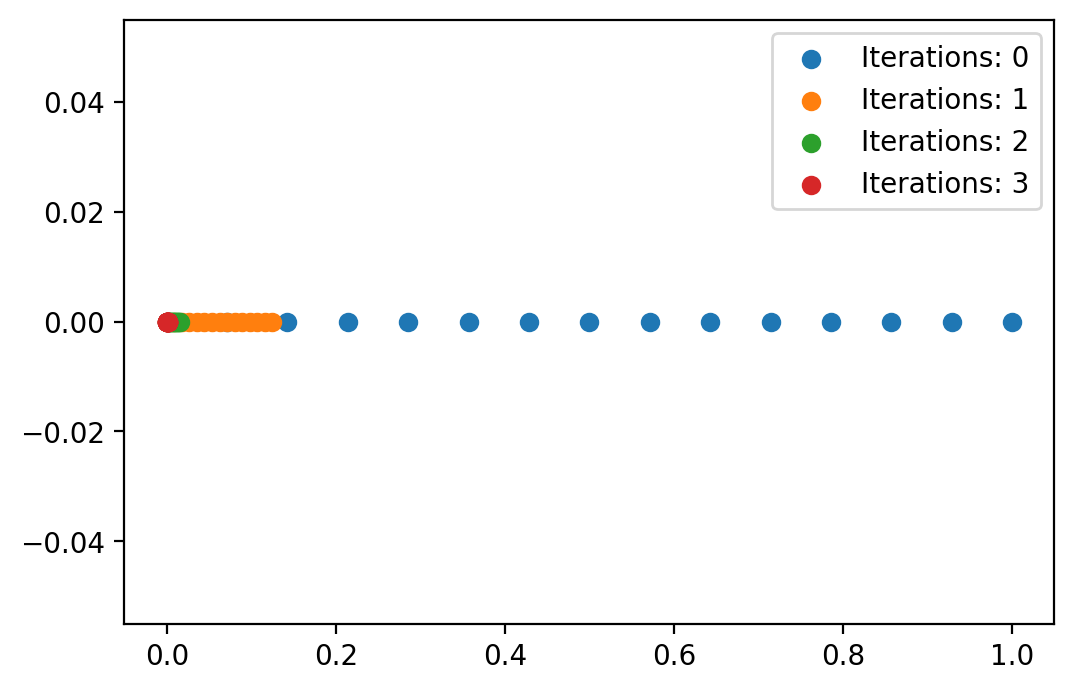

In [5]:
# Plotting Functionality and NumPy math package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# For plotting inline without calling show()
# To make inline plots appear larger
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100


# Make and array of 15 evenly spaced points
x = np.linspace(0,1,15)

# Define contraction mapping f: R -> R f(x) = (1/8)*x

def f(x):
    return .125*x


#Plot the inputs (x) on a "Real line"
plt.scatter(x,[0]*len(x), label = "Iterations: 0" )

y = f(x)
j = 0
for j in range(0,3):
    plt.scatter(y,[0]*len(x), label=f"Iterations: {j+1}")
    y=f(y)
    j+=1
plt.legend()

---
## Iterated Function Systems
---
An **Iterated Function System**, $F$, is a finite set of contraction mappings $f_1,...,f_n: A \rightarrow A$,
<br/><br/>
<center>$F = \{f_1,f_2,f_3,...,f_n\}$</center> 

That's it. That's basically it. I want to touch on the theorem which makes these systems so interesting to look at. The theorem also known as Banach's fixed-point theorem.

### Contraction Mapping Theorem
---
An important theorem called the [contraction mapping principle](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem) guarantees that iterating the output of a contraction mapping through the input repeatedly will produce a fixed point solution (something akin to $f(x)=x$).

However, often, our solutions to IFS's will not arise as "points" as we normally think of them. We'll see that we obtain sets which are fractal boundaries of fixed points or **attractors** of the IFS (something like $F(S) = S$).



>**Note:** This notion of distance is a very generalized one, which uses a somewhat odd notation:<center>"The distance from $x$ in $A$ to $y$ in $A$" is $d(x,y)$ </center>
You're invited to look up and try to apply [different metrics](https://en.wikipedia.org/wiki/Metric_(mathematics)#Examples) to visualize IFS's through. However, we will restrict ourselves to using the euclidean metric on compact subsets of $\mathbb{R}^n$.

# Fractal Time!

Believe me that the following is an IFS: <br/><br/>
$F = 
\begin{cases}
f_1(x,y) = \frac{1}{2}(x,y) + (0,0) \\
f_2(x,y) = \frac{1}{2}(x,y) + (1/4,1/2) \\ 
f_3(x,y) = \frac{1}{2}(x,y) + (1/2,0) 
\end{cases}
$ <br/><br/>
Where $f_i: \mathbb{R}^2 \rightarrow \mathbb{R}^2$.

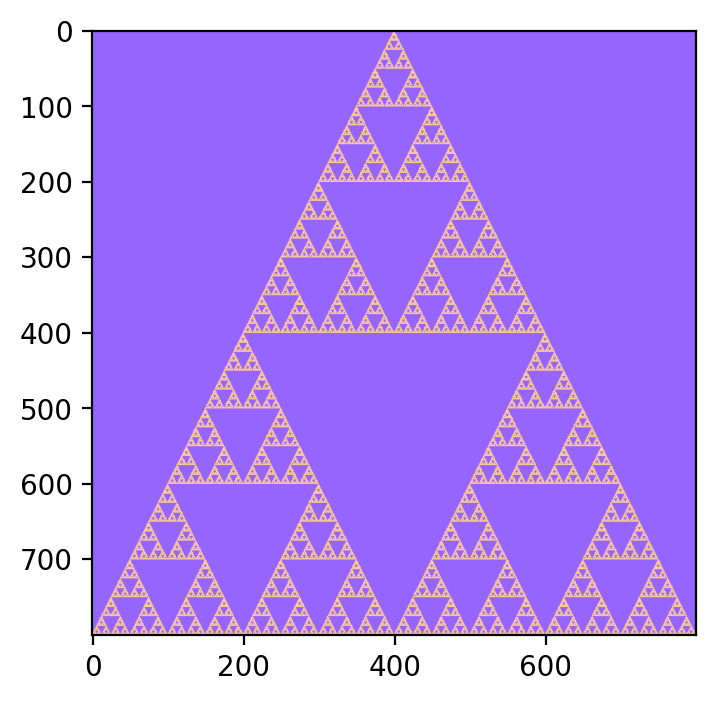

In [6]:
############################################################
# This algorithm is only slightly modified from Risto A. 
# Paju's ifs.py at [algoristo.com/teaching/ifs.py].
############################################################

############################################################
# I chose this algorithm because it was simple, quick and 
# readable. I'll try to annotate how the algorithm works.
############################################################


# Pillow image package
from PIL import Image

# Running imshow(np.asarray(IMAGE_OBJ)) produces an inline image
from matplotlib.pyplot import imshow

# Math and logic for iterating through IFS
from random import random, choice
import math


# Number of points
ninit = 1000000

# How many times they are iterated through the IFS
niter = 12

# This will contain the outputs of the IFS after the 12 iterations
points = []

# Example IFS: Sierpinski triangle

def s1(x, y):
    return x/2, y/2

def s2(x, y):
    return x/2 + 0.5, y/2

def s3(x, y):
    return x/2 + 0.25, y/2 + 0.5

ifs = [s1, s2, s3]

for i in range(1, ninit + 1):
    # Random point, doesn't matter where you start
    x = random()
    y = random()
    
    # This will iterate (x,y) through f, and then input
    # f(x,y) through f again, for niter iterations.
    for j in range(1, niter + 1):
        f = choice(ifs)
        x, y = f(x, y)
    points.append([x,y])


# Creating an image object and image properties for PIL

width,height = 800,800
im = Image.new(mode="RGB",size = (width,height), color =(150,100,255))

# This gives an array of RGB pixel values which we can manually edit
px = im.load()

# In this loop we scale each point to the width and
# height of the screen. Then, we color the point

for p in points:
    v,w = int(p[0]*width),int(p[1]*height)
    if not(v>width or w>height):
        px[v,w] = (250,200,150)
        
# Height in PIL is counted from the top, so we need to flip the images upside down

im = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
imshow(np.asarray(im))
im.save("sierpinski-ifs.jpg")

### Now you try!
I encourage you to try some other IFS systems, or play with some scales. Let's look at a slightly bigger example, an IFS with 8 functions!

Below the IFS is the output you should expect from applying the code above:

<br/><br/>
$F = 
\begin{cases}
f_1(x,y) = \frac{1}{3}(x,y) + (0,0) \\
f_2(x,y) = \frac{1}{3}(x,y) + (0,1/3) \\ 
f_3(x,y) = \frac{1}{3}(x,y) + (0,2/3) \\
f_4(x,y) = \frac{1}{3}(x,y) + (1/3,0) \\
f_5(x,y) = \frac{1}{3}(x,y) + (1/3,2/3) \\
f_6(x,y) = \frac{1}{3}(x,y) + (2/3,0) \\
f_7(x,y) = \frac{1}{3}(x,y) + (2/3,1/3) \\
f_8(x,y) = \frac{1}{3}(x,y) + (2/3,2/3) \\
\end{cases}
$ <br/><br/>
> By the way, if you want to insert another code cell below this one you can use <kbd>Esc</kbd> (to enter command mode) and then <kbd>A</kbd> or <kbd>B</kbd> to insert a cell above or below, respectively.

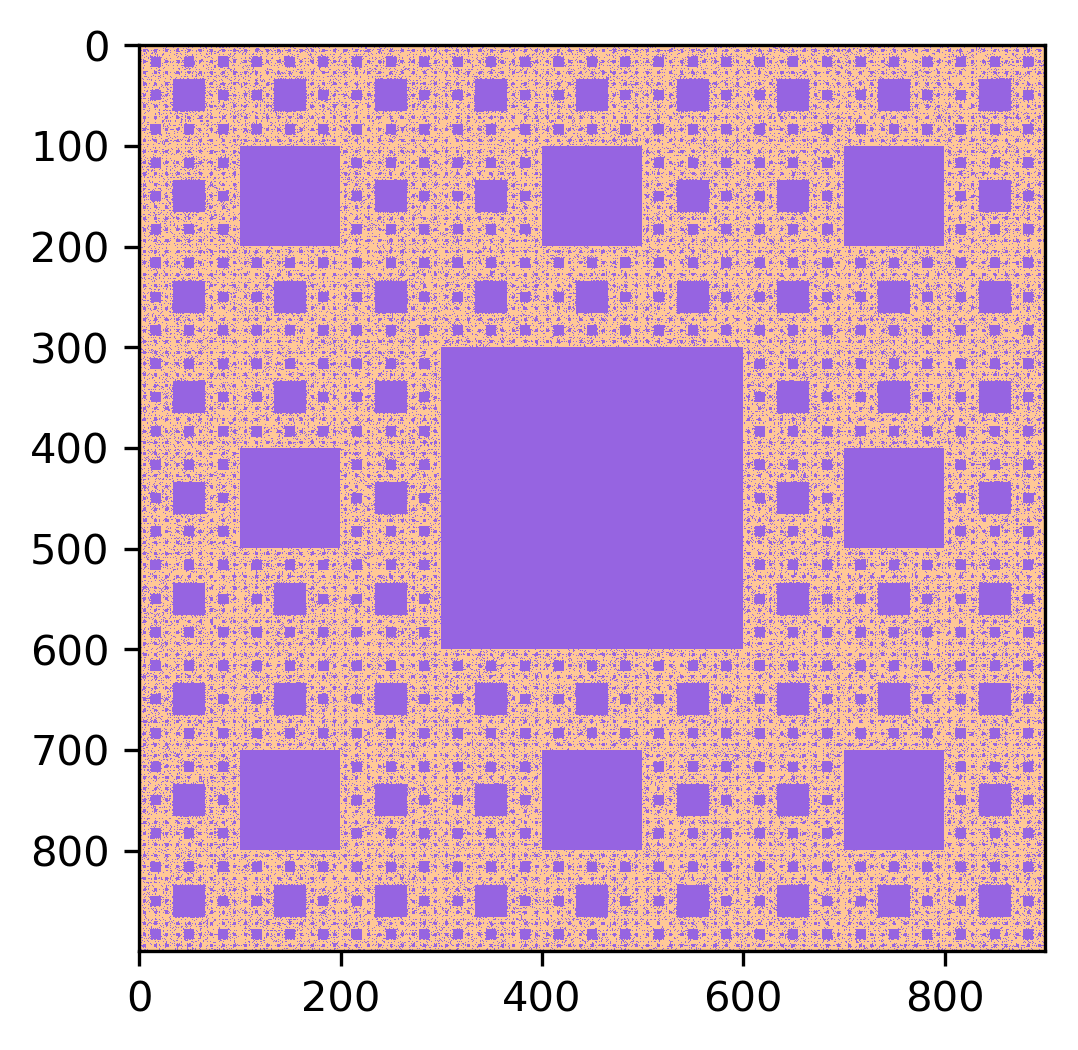

In [42]:
def s1(x, y):
    return x/3, y/3

def s2(x, y):
    return x/3, y/3 + 1/3

def s3(x, y):
    return x/3 , y/3 + 2/3

def s4(x, y):
    return x/3 + 1/3, y/3 +0

def s5(x, y):
    return x/3 + 1/3, y/3 + 2/3

def s6(x, y):
    return x/3 + 2/3, y/3 + 0

def s7(x, y):
    return x/3 + 2/3, y/3 + 1/3

def s8(x, y):
    return x/3 + 2/3, y/3 + 2/3



ifs = [s1, s2, s3, s4, s5, s6, s7, s8]
ninit = 1000000
niter = 12
points = []


for i in range(1, ninit + 1):
    # Random point
    x = random()
    y = random()
    
    for j in range(1, niter + 1):
        f = choice(ifs)
        x, y = f(x, y)
    points.append([x,y])

width,height = 900,900
im = Image.new(mode="RGB",size = (width,height), color =(150,100,225))
px = im.load()

total = len(points)
for p in points:

    x,y = int(p[0]*width),int(p[1]*height)
    if not(x>width or y>height):
        px[x,y] = (255,200,150)
im = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
imshow(np.asarray(im))

See if you can produce the following fractal image by slightly modifying the previous IFS.

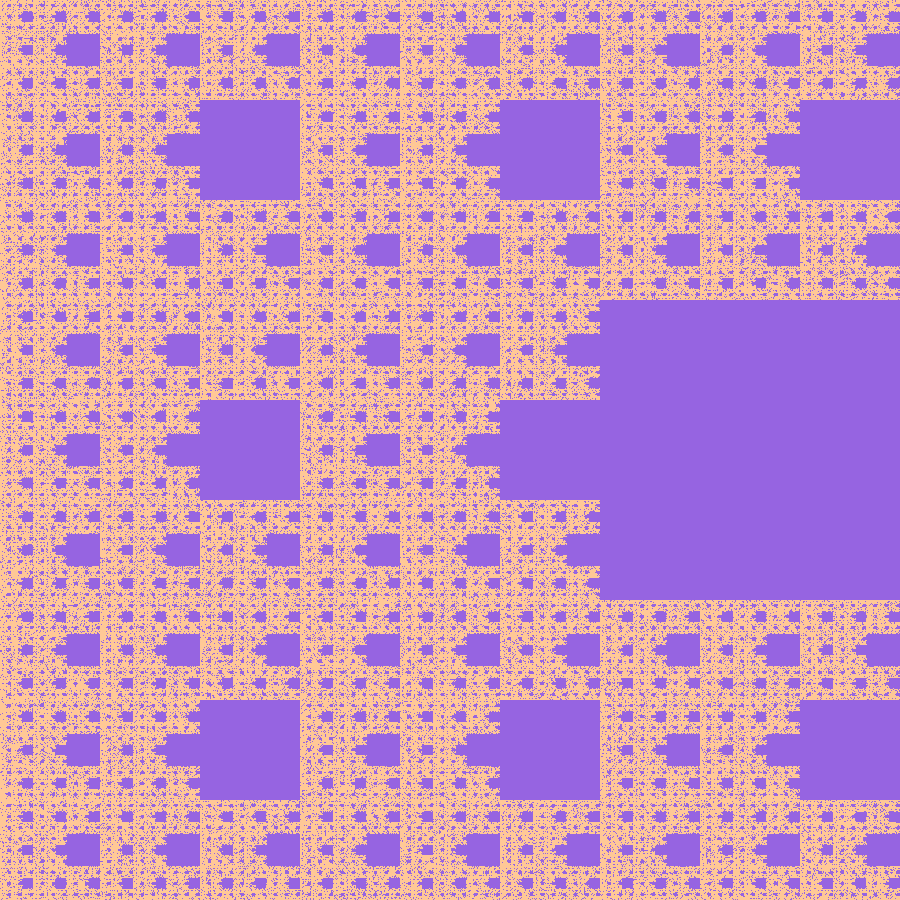